## Extract Dataset

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

## Download Data 

In [ ]:
! kaggle datasets download vinayakshanawad/heart-rate-prediction-to-monitor-stress-level

 92% 129M/140M [00:01<00:00, 108MB/s]
100% 140M/140M [00:01<00:00, 92.3MB/s]


## Extract Dataset

In [ ]:
import zipfile
with zipfile.ZipFile('/content/heart-rate-prediction-to-monitor-stress-level.zip', 'r') as zip_ref:
    zip_ref.extractall('heart')

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
## Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector
from typing import Tuple, Union, List
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from keras.utils import to_categorical

## Train Data

In [ ]:
fdf = pd.read_csv('/content/heart/Train Data/Train Data Zip/frequency_domain_features_train.csv')
hrn = pd.read_csv('/content/heart/Train Data/Train Data Zip/heart_rate_non_linear_features_train.csv')
tdf = pd.read_csv('/content/heart/Train Data/Train Data Zip/time_domain_features_train.csv')

train_df = pd.merge(fdf, hrn, on='uuid')
train_df = pd.merge(train_df, tdf, on='uuid')

## Test Data

In [ ]:
 ## Test Data
tfdf = pd.read_csv('/content/heart/Test Data/Test Zip/frequency_domain_features_test.csv')
thrn = pd.read_csv('/content/heart/Test Data/Test Zip/heart_rate_non_linear_features_test.csv')
ttdf = pd.read_csv('/content/heart/Test Data/Test Zip/time_domain_features_test.csv')

test_df = pd.merge(tfdf, thrn, on='uuid')
test_df = pd.merge(test_df, ttdf, on='uuid')

In [ ]:
df = pd.concat([train_df, test_df])
df = df.drop(['uuid', 'HR'], axis=1)
#df = df[0:3000]

## Label Encoder
lb = LabelEncoder()  ## Encoder that convert and store all the information
df['condition'] = lb.fit_transform(df['condition'])

x = df.drop('condition', axis=1)
y = df.condition

## Feature Selection

In [ ]:
## Model
lrr = LogisticRegression(penalty="l2",)
lrr.fit(x, y)
result = permutation_importance(lrr, x, y, n_repeats=3, random_state=0)
sorted_idx = result.importances_mean.argsort()
index = sorted_idx[25:33]
x = x.iloc[:, index]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
result

{'importances_mean': array([ 2.42234148e-01,  2.32524700e-02,  1.61294463e-01,  2.20152303e-04,
        -1.55487641e-03,  1.32359464e-02,  2.68082140e-05,  2.05529641e-04,
         1.77521556e-01,  1.99128164e-02,  0.00000000e+00,  1.30791590e-04,
         5.57204667e-03,  1.62474024e-06,  1.62474024e-06,  0.00000000e+00,
         1.65853484e-02,  4.61101281e-02,  2.67351007e-03,  2.46148147e-04,
         2.46960517e-04,  4.81735483e-04,  7.81743769e-03,  2.43711037e-06,
         1.05608116e-04,  1.21855518e-05,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.24948049e-06,
         1.05608116e-04,  1.21855518e-05]),
 'importances_std': array([6.31633312e-04, 1.96949080e-04, 3.06303398e-04, 2.19189442e-05,
        1.07472607e-04, 6.80938697e-05, 1.10792513e-05, 2.26300130e-05,
        6.86005083e-04, 2.32079230e-04, 0.00000000e+00, 1.32493557e-05,
        2.06386783e-04, 3.03961067e-06, 1.14886484e-06, 0.00000000e+00,
        3.12586258e-0

In [ ]:
  # Standardizing the features
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
""" Select the 80% of the data as Training data and 20% as test data """
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=85, shuffle=True, stratify=y)

## Train

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

## Model Accuracy

In [ ]:
pred = lr.predict(x_test)

In [ ]:
print("Train score is:",lr.score(x_test,y_test)*100)

Train score is: 59.28227624444038


## Evaluation Metric

In [ ]:
## Evaluation Matrics
from sklearn.metrics import confusion_matrix,classification_report

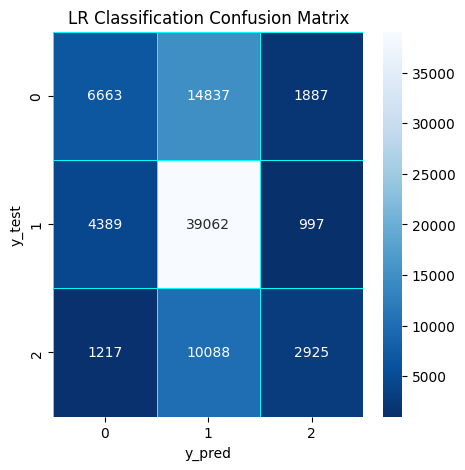

In [ ]:
# Creating the confusion matrix:
knn_cm = confusion_matrix(y_test, pred)
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='Blues_r')
plt.title('LR Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.54      0.28      0.37     23387
           1       0.61      0.88      0.72     44448
           2       0.50      0.21      0.29     14230

    accuracy                           0.59     82065
   macro avg       0.55      0.46      0.46     82065
weighted avg       0.57      0.59      0.55     82065



## Deep learing

In [ ]:
df = pd.concat([train_df, test_df])
df = df.drop(['uuid', 'HR'], axis=1)
#df = df[0:3000]

## Label Encoder
lb = LabelEncoder()  ## Encoder that convert and store all the information
df['condition'] = lb.fit_transform(df['condition'])

x = df.drop('condition', axis=1)
y = df.condition

In [ ]:
## Model
lrr = LogisticRegression(penalty="l2",)
lrr.fit(x, y)
result = permutation_importance(lrr, x, y, n_repeats=3, random_state=0)
sorted_idx = result.importances_mean.argsort()
index = sorted_idx[25:33]
x = x.iloc[:, index]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
  # Standardizing the features
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
y = to_categorical(y)

In [ ]:
""" Select the 80% of the data as Training data and 20% as test data """
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=85, shuffle=True, stratify=y)

## Deep Learning

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [ ]:
n_cols = x_train.shape[1]
input_shape = (n_cols,)

# Define model architecture
# n_cols = X_train.shape[1]
model = Sequential()
# model.add(Dense(50, input_dim=33, activation='relu'))
model.add(Dense(50, activation='relu', input_shape = input_shape))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax')) # change to 8 neurons

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [ ]:
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
8207/8207 [==============================] - 22s 3ms/step - loss: 0.4871 - accuracy: 0.7969 - val_loss: 0.3531 - val_accuracy: 0.8604
Epoch 2/15
8207/8207 [==============================] - 23s 3ms/step - loss: 0.2968 - accuracy: 0.8834 - val_loss: 0.2645 - val_accuracy: 0.8957
Epoch 3/15
8207/8207 [==============================] - 20s 2ms/step - loss: 0.2367 - accuracy: 0.9072 - val_loss: 0.2172 - val_accuracy: 0.9141
Epoch 4/15
8207/8207 [==============================] - 21s 3ms/step - loss: 0.2012 - accuracy: 0.9228 - val_loss: 0.1930 - val_accuracy: 0.9253
Epoch 5/15
8207/8207 [==============================] - 19s 2ms/step - loss: 0.1768 - accuracy: 0.9323 - val_loss: 0.1638 - val_accuracy: 0.9368
Epoch 6/15
8207/8207 [==============================] - 21s 3ms/step - loss: 0.1572 - accuracy: 0.9405 - val_loss: 0.1510 - val_accuracy: 0.9457
Epoch 7/15
8207/8207 [==============================] - 20s 2ms/step - loss: 0.1427 - accuracy: 0.9462 - val_loss: 0.1297 - val_ac

In [ ]:
model.evaluate(x_test, y_test)

2565/2565 [==============================] - 5s 2ms/step - loss: 0.0912 - accuracy: 0.9675


[0.09123361110687256, 0.9674526453018188]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 32)                1632      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,181
Trainable params: 2,181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# assuming X_test contains the test data
y_pred = model.predict(x_test)

# get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)

2565/2565 [==============================] - 4s 1ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)

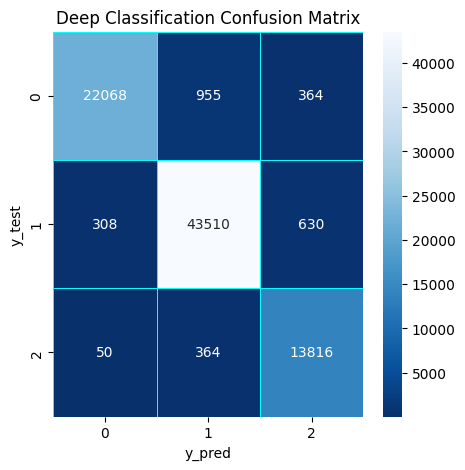

In [ ]:
# Creating the confusion matrix:
knn_cm = confusion_matrix(y_test_labels, y_pred_labels)
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='Blues_r')
plt.title('Deep Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [ ]:
print(classification_report(y_pred_labels, y_test_labels))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     22426
           1       0.98      0.97      0.97     44829
           2       0.97      0.93      0.95     14810

    accuracy                           0.97     82065
   macro avg       0.96      0.96      0.96     82065
weighted avg       0.97      0.97      0.97     82065



## Client 2


In [ ]:
df = pd.concat([train_df, test_df])
df = df.drop(['uuid', 'HR'], axis=1)
#df = df[0:3000]

## Label Encoder
lb = LabelEncoder()  ## Encoder that convert and store all the information
df['condition'] = lb.fit_transform(df['condition'])

x = df.drop('condition', axis=1)
y = df.condition

In [ ]:
## Model
lrr = LogisticRegression(penalty="l2",)
lrr.fit(x, y)
result = permutation_importance(lrr, x, y, n_repeats=3, random_state=0)
sorted_idx = result.importances_mean.argsort()
index = sorted_idx[17:25]
x = x.iloc[:, index]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
  # Standardizing the features
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
y = to_categorical(y)

In [ ]:
""" Select the 80% of the data as Training data and 20% as test data """
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=85, shuffle=True, stratify=y)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [ ]:
n_cols = x_train.shape[1]
input_shape = (n_cols,)

# Define model architecture
# n_cols = X_train.shape[1]
model = Sequential()
# model.add(Dense(50, input_dim=33, activation='relu'))
model.add(Dense(50, activation='relu', input_shape = input_shape))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax')) # change to 8 neurons

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
8207/8207 [==============================] - 20s 2ms/step - loss: 0.6241 - accuracy: 0.7222 - val_loss: 0.5075 - val_accuracy: 0.7696
Epoch 2/15
8207/8207 [==============================] - 21s 3ms/step - loss: 0.4609 - accuracy: 0.7993 - val_loss: 0.4215 - val_accuracy: 0.8194
Epoch 3/15
8207/8207 [==============================] - 23s 3ms/step - loss: 0.3990 - accuracy: 0.8326 - val_loss: 0.3778 - val_accuracy: 0.8445
Epoch 4/15
8207/8207 [==============================] - 19s 2ms/step - loss: 0.3632 - accuracy: 0.8511 - val_loss: 0.3583 - val_accuracy: 0.8567
Epoch 5/15
8207/8207 [==============================] - 22s 3ms/step - loss: 0.3417 - accuracy: 0.8618 - val_loss: 0.3241 - val_accuracy: 0.8722
Epoch 6/15
8207/8207 [==============================] - 22s 3ms/step - loss: 0.3252 - accuracy: 0.8695 - val_loss: 0.3301 - val_accuracy: 0.8652
Epoch 7/15
8207/8207 [==============================] - 20s 2ms/step - loss: 0.3126 - accuracy: 0.8753 - val_loss: 0.3038 - val_ac

In [ ]:
model.evaluate(x_test, y_test)

2565/2565 [==============================] - 4s 2ms/step - loss: 0.2445 - accuracy: 0.9027


[0.24447256326675415, 0.9027478098869324]

In [ ]:
# assuming X_test contains the test data
y_pred = model.predict(x_test)

# get the predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)

2565/2565 [==============================] - 4s 2ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)

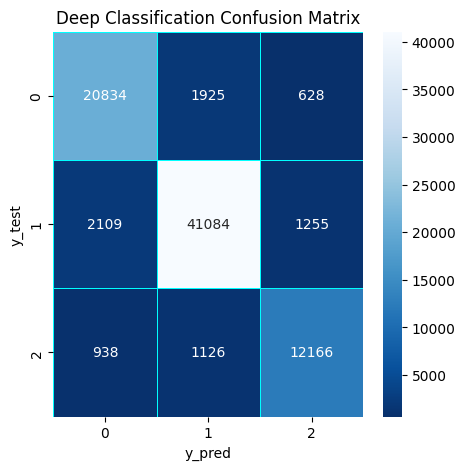

In [ ]:
# Creating the confusion matrix:
knn_cm = confusion_matrix(y_test_labels, y_pred_labels)
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='Blues_r')
plt.title('Deep Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [ ]:
print(classification_report(y_pred_labels, y_test_labels))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     23881
           1       0.92      0.93      0.93     44135
           2       0.85      0.87      0.86     14049

    accuracy                           0.90     82065
   macro avg       0.89      0.89      0.89     82065
weighted avg       0.90      0.90      0.90     82065

